**Import libraries**

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
url="https://raw.githubusercontent.com/sohamglobal/datasets/refs/heads/main/online_purchases.csv"
df=pandas.read_csv(url)
print(df)

      customer_name  age  gender  platform product_category product_name  \
0      Vivaan Patel   31    Male    Myntra      Electronics       Laptop   
1       Ananya Iyer   35  Female  Flipkart           Beauty      Perfume   
2        Neha Joshi   40  Female    Myntra      Electronics  Smart Watch   
3      Vihaan Gupta   26    Male    Amazon           Beauty     Lipstick   
4    Priya Malhotra   59  Female  Flipkart      Electronics       Laptop   
..              ...  ...     ...       ...              ...          ...   
295   Nikhil Bansal   18    Male  Flipkart           Beauty      Perfume   
296     Pooja Patil   47  Female  Flipkart      Electronics       Laptop   
297    Vivaan Patel   31    Male    Amazon      Electronics   Headphones   
298       Sneha Rao   33  Female    Amazon      Electronics   Headphones   
299      Amit Singh   42    Male    Myntra      Electronics  Smart Watch   

        company  quantity  unit_price  gross_amount  discount_amount  \
0          Dell

**Data Cleaning**

In [3]:
print(df.columns)

Index(['customer_name', 'age', 'gender', 'platform', 'product_category',
       'product_name', 'company', 'quantity', 'unit_price', 'gross_amount',
       'discount_amount', 'netbill', 'payment_mode', 'rating_out_of_5'],
      dtype='object')


In [4]:
df.rename(columns={
    "product_category":"category",
    "discount_amount":"discount",
    "rating_out_of_5":"rating"
},inplace=True)
print(df.columns)

Index(['customer_name', 'age', 'gender', 'platform', 'category',
       'product_name', 'company', 'quantity', 'unit_price', 'gross_amount',
       'discount', 'netbill', 'payment_mode', 'rating'],
      dtype='object')


In [5]:
df["payment_mode"]=df["payment_mode"].replace("Cash on Delivery","COD")
print(df)

      customer_name  age  gender  platform     category product_name  \
0      Vivaan Patel   31    Male    Myntra  Electronics       Laptop   
1       Ananya Iyer   35  Female  Flipkart       Beauty      Perfume   
2        Neha Joshi   40  Female    Myntra  Electronics  Smart Watch   
3      Vihaan Gupta   26    Male    Amazon       Beauty     Lipstick   
4    Priya Malhotra   59  Female  Flipkart  Electronics       Laptop   
..              ...  ...     ...       ...          ...          ...   
295   Nikhil Bansal   18    Male  Flipkart       Beauty      Perfume   
296     Pooja Patil   47  Female  Flipkart  Electronics       Laptop   
297    Vivaan Patel   31    Male    Amazon  Electronics   Headphones   
298       Sneha Rao   33  Female    Amazon  Electronics   Headphones   
299      Amit Singh   42    Male    Myntra  Electronics  Smart Watch   

        company  quantity  unit_price  gross_amount  discount    netbill  \
0          Dell         3       35751        107253  23913.

# Understand the data

**Find the shape**

In [6]:
print(df.shape)

(300, 14)


**Statistical summary of data**

In [7]:
print(df.describe())

              age    quantity    unit_price   gross_amount      discount  \
count  300.000000  300.000000    300.000000     300.000000    300.000000   
mean    38.636667    2.546667   8214.183333   21348.690000   3906.177267   
std     11.744122    1.106905  11626.171035   34439.416717   7658.654299   
min     18.000000    1.000000    481.000000     632.000000     40.500000   
25%     29.000000    2.000000   1985.000000    4246.250000    662.677500   
50%     39.000000    3.000000   5063.000000   11442.500000   1708.375000   
75%     48.000000    3.250000   9948.000000   23872.250000   3831.220000   
max     60.000000    4.000000  77439.000000  250732.000000  58984.260000   

             netbill      rating  
count     300.000000  300.000000  
mean    17442.512733    4.001333  
std     27294.378644    0.596196  
min       571.660000    3.000000  
25%      3630.557500    3.500000  
50%      8713.145000    4.000000  
75%     19687.867500    4.500000  
max    193477.450000    5.000000  


In [8]:
print(df["netbill"].describe())

count       300.000000
mean      17442.512733
std       27294.378644
min         571.660000
25%        3630.557500
50%        8713.145000
75%       19687.867500
max      193477.450000
Name: netbill, dtype: float64


**Quality Check**

In [9]:
print(df.isnull())

     customer_name    age  gender  platform  category  product_name  company  \
0            False  False   False     False     False         False    False   
1            False  False   False     False     False         False    False   
2            False  False   False     False     False         False    False   
3            False  False   False     False     False         False    False   
4            False  False   False     False     False         False    False   
..             ...    ...     ...       ...       ...           ...      ...   
295          False  False   False     False     False         False    False   
296          False  False   False     False     False         False    False   
297          False  False   False     False     False         False    False   
298          False  False   False     False     False         False    False   
299          False  False   False     False     False         False    False   

     quantity  unit_price  gross_amount

In [10]:
print(df.isnull().sum())

customer_name    0
age              0
gender           0
platform         0
category         0
product_name     0
company          0
quantity         0
unit_price       0
gross_amount     0
discount         0
netbill          0
payment_mode     0
rating           0
dtype: int64


In [11]:
print(df.duplicated().sum())

0


# Feature Understanding

**Verify business logic**

In [12]:
df["calculated_net"]=df["gross_amount"]-df["discount"]
(df["calculated_net"]==df["netbill"]).value_counts()

,count
True,275
False,25


In [13]:
df["netbill"]=df["gross_amount"]-df["discount"]

In [14]:
df["calculated_net"]=df["gross_amount"]-df["discount"]
(df["calculated_net"]==df["netbill"]).value_counts()

,count
True,300


**Calculate the discount percentage**

In [15]:
df["discount_percent"]=round((df["discount"]/df["gross_amount"])*100,2)
print(df.head())

    customer_name  age  gender  platform     category product_name  \
0    Vivaan Patel   31    Male    Myntra  Electronics       Laptop   
1     Ananya Iyer   35  Female  Flipkart       Beauty      Perfume   
2      Neha Joshi   40  Female    Myntra  Electronics  Smart Watch   
3    Vihaan Gupta   26    Male    Amazon       Beauty     Lipstick   
4  Priya Malhotra   59  Female  Flipkart  Electronics       Laptop   

      company  quantity  unit_price  gross_amount  discount    netbill  \
0        Dell         3       35751        107253  23913.24   83339.76   
1        Fogg         2        1827          3654    961.76    2692.24   
2       Noise         4        6265         25060   5548.63   19511.37   
3  Maybelline         2         888          1776    258.92    1517.08   
4        Dell         2       76105        152210  36125.59  116084.41   

  payment_mode  rating  calculated_net  discount_percent  
0  Credit Card     4.4        83339.76             22.30  
1   Debit Card  

# Data Analysis & Data Visualization

**Univariate Analysis (Single column)**

In [16]:
print(df["age"].value_counts().head(10))

age
33    14
49    11
40    10
20    10
22    10
43    10
23    10
28     9
27     9
45     9
Name: count, dtype: int64


In [20]:
count=df[df["age"]>50].shape[0]
print(f"Total orders from customers having age more than 50 : {count}")
count=df[df["age"]<30].shape[0]
print(f"Total orders from customers having age less than 30 : {count}")


Total orders from customers having age more than 50 : 59
Total orders from customers having age less than 30 : 78


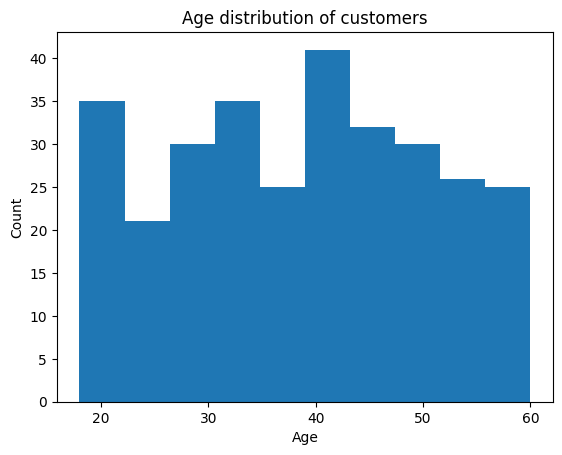

In [21]:
plt.figure()
plt.hist(df["age"],bins=10)
plt.title("Age distribution of customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Analysis on Gender**

In [23]:
print(df["gender"].value_counts())
total=df["gender"].value_counts().sum()
gender_count=df["gender"].value_counts()
gender_perc=gender_count/total*100
print(gender_perc)

gender
Male      183
Female    117
Name: count, dtype: int64
gender
Male      61.0
Female    39.0
Name: count, dtype: float64


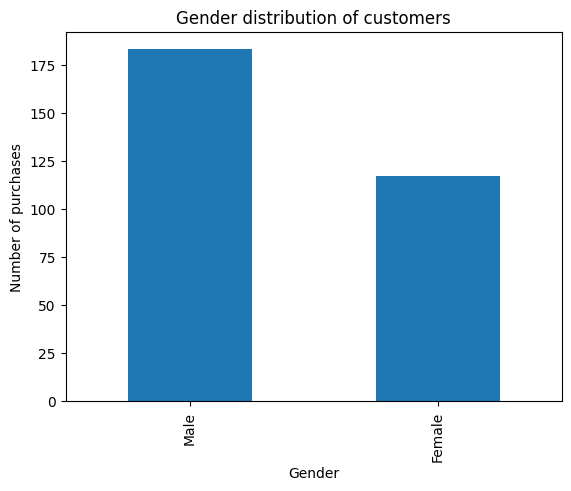

In [24]:
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender distribution of customers")
plt.xlabel("Gender")
plt.ylabel("Number of purchases")
plt.show()

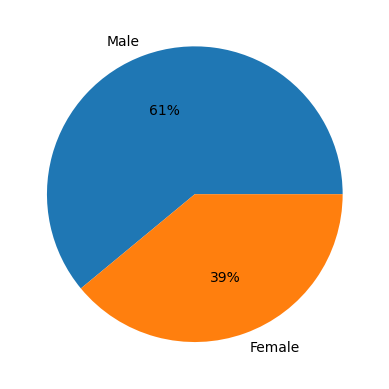

In [25]:
plt.pie(gender_perc,labels=gender_perc.index,autopct="%1.f%%")
plt.show()

**Platform analysis**

In [26]:
print(df["platform"].value_counts())
total=df["platform"].value_counts().sum()
platform_count=df["platform"].value_counts()
platform_perc=platform_count/total*100
print(platform_perc)

platform
Myntra      106
Amazon       99
Flipkart     95
Name: count, dtype: int64
platform
Myntra      35.333333
Amazon      33.000000
Flipkart    31.666667
Name: count, dtype: float64


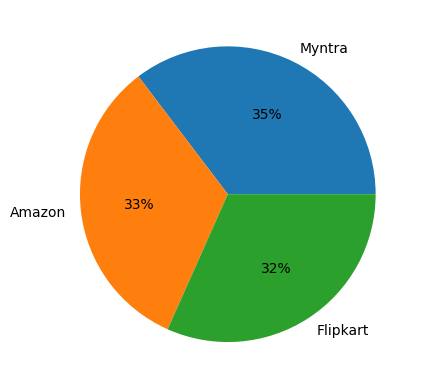

In [27]:
plt.pie(platform_perc,labels=platform_perc.index,autopct="%1.f%%")
plt.show()

**Category analysis**

In [28]:
print(df["category"].value_counts())
total=df["category"].value_counts().sum()
cat_count=df["category"].value_counts()
cat_perc=cat_count/total*100
print(cat_perc)

category
Electronics       78
Home & Kitchen    77
Fashion           73
Beauty            72
Name: count, dtype: int64
category
Electronics       26.000000
Home & Kitchen    25.666667
Fashion           24.333333
Beauty            24.000000
Name: count, dtype: float64


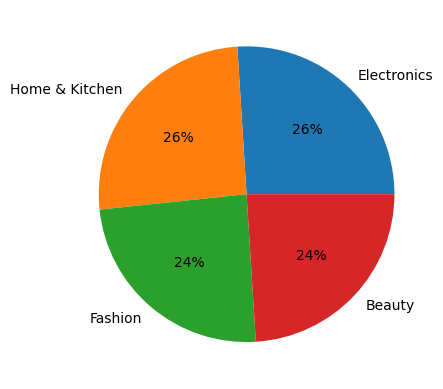

In [29]:
plt.pie(cat_perc,labels=cat_perc.index,autopct="%1.f%%")
plt.show()

**Bivariate analysis (two columns)**

In [30]:
print(df.groupby("platform")["netbill"].sum())

platform
Amazon      1521033.55
Flipkart    1598898.91
Myntra      2112821.36
Name: netbill, dtype: float64


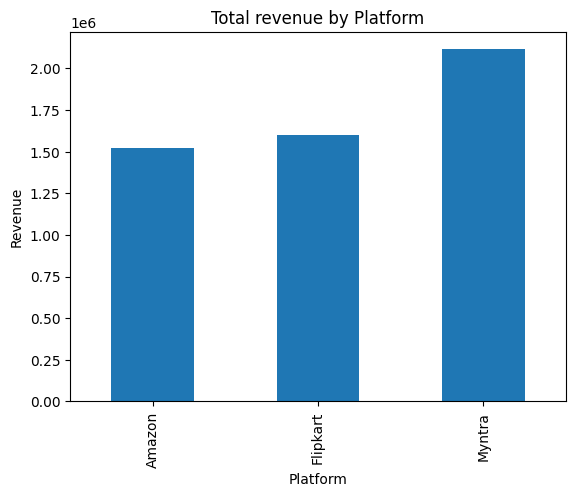

In [31]:
platform_revenue=df.groupby("platform")["netbill"].sum()
platform_revenue.plot(kind="bar")
plt.title("Total revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue")
plt.show()


**Platform wise category revenue**

category    Beauty  Electronics    Fashion  Home & Kitchen
platform                                                  
Amazon    87356.60    858928.62  160141.87       414606.46
Flipkart  62935.77   1009398.36  229086.98       297477.80
Myntra    53491.42   1312103.82  274547.15       472678.97


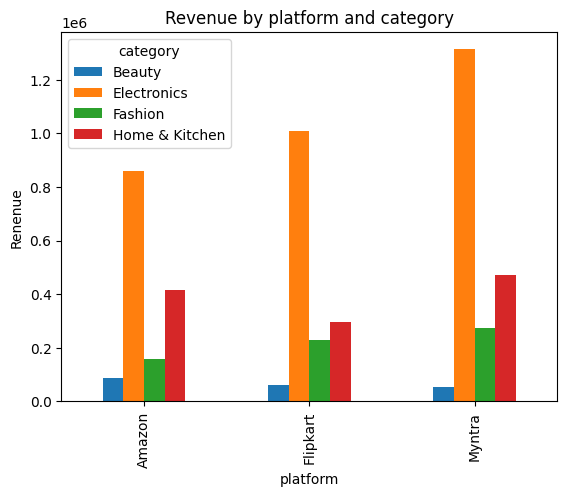

In [33]:
pivot_table=pandas.pivot_table(
    df,
    values="netbill",
    index="platform",
    columns="category",
    aggfunc="sum"
)
print(pivot_table)
pivot_table.plot(kind="bar")
plt.title("Revenue by platform and category")
plt.ylabel("Renenue")
plt.show()

In [35]:
print(df["payment_mode"].value_counts())

payment_mode
Credit Card    70
Debit Card     62
UPI            60
COD            55
Net Banking    53
Name: count, dtype: int64
